In [415]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# dla srodowiska nie jupyter notebook komentujemy %matplotlib inline sluzy ona tylko do wyswietlenia wykresow
%matplotlib inline

In [420]:
# Pobierz obraz
im = Image.open('cameraman.tif')
# np array "kompresuje" obraz do jednowymiarowego ciagu
imarray = np.array(im)
# Wartość N to dlugosc ciagu
n = np.size(imarray)

In [421]:
def histogram(image):
    # Funkcja unique + return_counts=True dla numpy array listuje elementy wystepujace
    # w ciagu razem z ich czestotliwościa
    unique, counts = np.unique(imarray, return_counts=True)
    # Wynikiem jest slownik odcieni od 0 do 255 i ich czestotliwosc w obrazie
    hist = dict(zip(unique, counts))
    return hist

In [422]:
# Otrzymuje swoj histogram
hist = histogram(imarray)

In [423]:
def no(t):
    # Obliczam sume poprzez wbudowana funkcje np array "sum", ktora sumuje ciag
    # Ciag przedstawilam za pomoca list comprehension 
    return np.sum([hist[i] for i in range(t-1) if i in hist])

In [424]:
def mso(t):
    # Obliczam sume poprzez wbudowana funkcje np array "sum", ktora sumuje ciag
    # Ciag przedstawilam za pomoca list comprehension 
    licznik = np.sum([i*hist[i] for i in range(t-1) if i in hist])
    # Aby uniknac exception "inf" zwiazanym z dzieleniem przez 0, sprawdzam, czy no jest zerem
    if no(t) == 0:
        return 0
    else: 
        return licznik / no(t)

In [425]:
def po(t):
    # n zawsze jest > 0, nie ma potrzeby sprawdzac warunku 
    return no(t) / n

In [426]:
def ms1(t):
    licznik = np.sum([ i*hist[i] for i in range(t, 256) if i in hist])
    # Aby uniknac exception "inf" zwiazanym z dzieleniem przez 0, sprawdzam, czy n - no jest zerem
    if (n - no(t)) == 0:
        mst1 = 0
    else:
        mst1 = licznik / (n - no(t))
    return mst1

In [427]:
def p1(t):
    return 1 - po(t)

In [428]:
def oblicz_t():
    # Tworze slownik klucz:wartosc, gdzie kluczem jest t a wartoscia jest obliczona funkcja
    # Slownik tworze przez dictionary comprehension
    t_values = {t: po(t) * p1(t) * ((mso(t) - ms1(t)) ** 2) for t in range(256)}
    # szukam t poprzez przeszukanie max wartosci t
    t = max(zip(t_values.values(), t_values.keys()))[1]
    return t

In [429]:
def rysuj_histogram(hist):
    # Generuje Histogram przy pomocy funckji pyplot
    plt.bar(list(hist.keys()), list(hist.values()), color='r')
    plt.title("Histogram")
    # zapisz wykres do pliku
    plt.savefig('histogram_lamar.jpg')
    # dla srodowiska nie jupyter notebook, trzeba dodac plt.show()

In [430]:
t = oblicz_t()
t

88

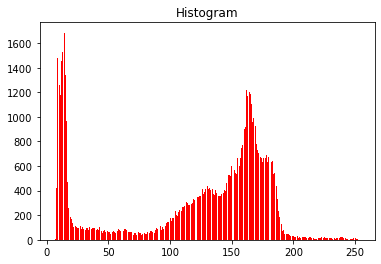

In [431]:
# podglad histogramu
rysuj_histogram(hist)
# podglad zdjecia
im.show()